# Práctica 2 – Estática. Registro de distancia y posición
Por Luna Kadysz y Kenneth Syddall

Link a la página de la materia:
https://materias.df.uba.ar/l4a2021c1/practica-11-estatica-registro-de-distancia-y-posicion/






## Actividad 2.1 
### Determinación del módulo de Young

Calcular cuánto se desplaza EL EXTREMO libre de la barra:
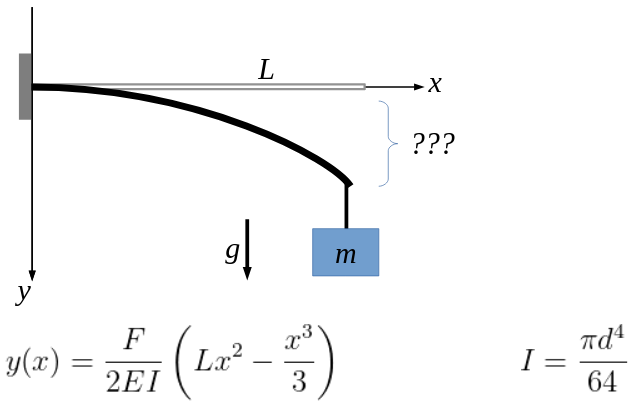

Datos:

E ≅ 10×1010 N/m2

L = 40 cm

d = 5 mm

m = 0.01 kg

Forma de entrega: Sin entrega. Estimar estas dos cantidades y dejar asentado el desarrollo de forma más o menos prolija en el “cuaderno de laboratorio”, sea el fomato que éste último tenga.

## Actividad 2.2 
### Sensores de distancia – longitud:
Elegir la tarea de medición mencionadas en la lista, según su número de grupo (Grupo 14 vuelvea la tarea 1). Para esta tarea, elegir un sistema de medición o sensor para realizarla y justifiquen(puede ser otro sensor que no hayamos mencionado en la clase eh!)

1.Distancia de la superficie de la tierra a una nube o capa de aerosoles atmosféricos

2.Dimensiones edilicias de una fábrica

3.Control del diámetro de agujeros de arandelas en una línea de producción.

4.Deformación por dilatación térmica del bloque del motor de un automóvil.

5.Distancia de la Tierra a la Luna.

6.Control de posición del cabezal de una impresora tipo plotter.

7.Distancia entre un automóvil y un obstáculo para maniobra de estacionamiento.

8.Diámetro de una broca de perforación (mecha) de taladro.

9.Distancia entre vehículos en movimiento para sistemas de conducción autónoma.

10.Diámetro de un cabello humano.


11.Distancia entre pupilas oculares humanas para fabricación de anteojos.

12.Mediciones antropométricas para reconocimiento facial.

13.Medición para realimentación de un sistema de actuadores para control de vuelo o de unbrazo robot.Reportar el intervalo de 
valores de distancias típicas para esa tarea y las precisiones requeridaspara dichas mediciones.

Justificar la elección del sistema de medición. Considerar tanto los rangos y precisiones del siste-ma de medición elegido como los aspectos metodológicos o procedimentales necesarios para rea-lizar la tarea.Buscar un equipo comercial o experimental que sea capaz de realizar la medición. Incluir cita olink al artículo u hoja de datos consultado. Reportar las especificaciones del instrumento o experi-mento que considere útiles para justificar la elección.Forma de entrega: Para la fecha definida en el cronograma, deberán armar una pre-sentación mínima (una, dos o a lo sumo tres diapositivas) describiendo las caracte-rísticas de la tarea a realizar, el sensor o instrumento elegido y una justificación paraello, basados en alguna especificación del mismo.

## Actividad 2.3
### Medición indirecta del tamaño de una rendija:

Conociendo cuánto se deforma el extremo de la barra (lo calcularon en la actividad anterior), y suponiendo que la rendija variable está ubicada en ese extremo de la barra, estimar la distancia necesaria a la  pantalla  para  estar  en  condición  de Fraunhoffer, y cuál sería la distancia entre franjas (o, más correcto, entre los mínimos de intensidad):
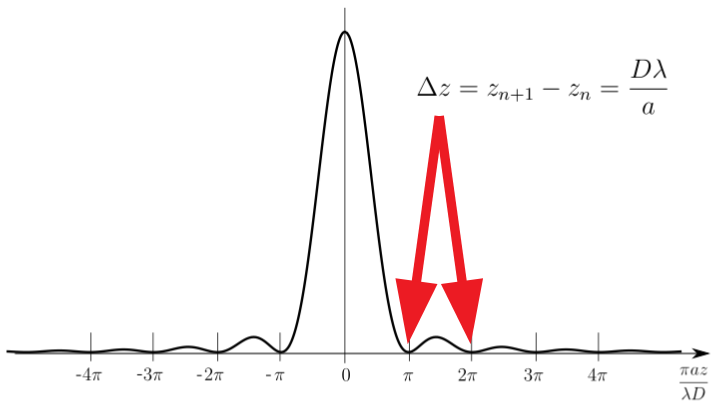
En la condición de Fraunhöffer, el patrón de interferencia está dado por
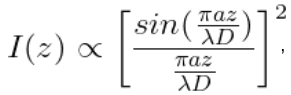
donde a es el tamaño de la rendija, D la distancia a la pantalla, z la coordenada sobre la pantalla y
$\lambda$ la longitud de onda de la fuente de luz utilizada.

Forma de entrega: Sin entrega. Estimar estas dos cantidades y dejar asentado el desarrollo de forma más o menos prolija en el “cuaderno de laboratorio”, sea el fomato que éste último tenga.

### VER QUE TODOS TENGAN ELMISMO LARGO DE PIXELES PARA PODER COMPARAR

In [1]:
import matplotlib
matplotlib.use('TkAgg')
#matplotlib.use('Qt5Agg')
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np

In [2]:
import os

frames = []
colors = ['Red','Green','Blue']
images_dict = {os.path.splitext(k)[0]: {} for k in os.listdir('Datos/datos_laton_laser_rojo') if os.path.splitext(k)[1] == '.jpg'}

#guardo todos los rgb por imagen de la carpeta
for i,file in enumerate(os.listdir('Datos/datos_laton_laser_rojo')):
    ext = os.path.splitext(file)[1] #agarro la extension del archivo
    if ext == '.jpg':
        img = imageio.imread(f'Datos/datos_laton_laser_rojo/{file}')
        images_dict[os.path.splitext(file)[0]] = {k: np.array(img[:,:,i])  for i,k in enumerate(colors)}

            

In [3]:
images_dict.keys()

dict_keys(['datosrojo1', 'datosrojo10', 'datosrojo2', 'datosrojo3', 'datosrojo4', 'datosrojo5', 'datosrojo6', 'datosrojo7', 'datosrojo8', 'datosrojo9', 'grilla_cali_rojo'])

### DATO ROJO  1

Text(0, 0.5, 'Pixeles[px]')

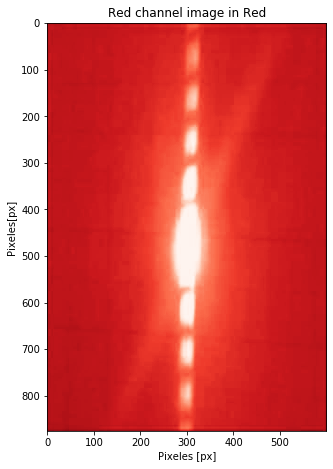

In [116]:
#probamos con rojo 

%matplotlib inline

color = 'Red'
A = images_dict['datosrojo1'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')


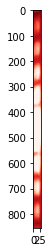

In [123]:
R = ndimage.rotate(A, 1.1)[15:870,300:330]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

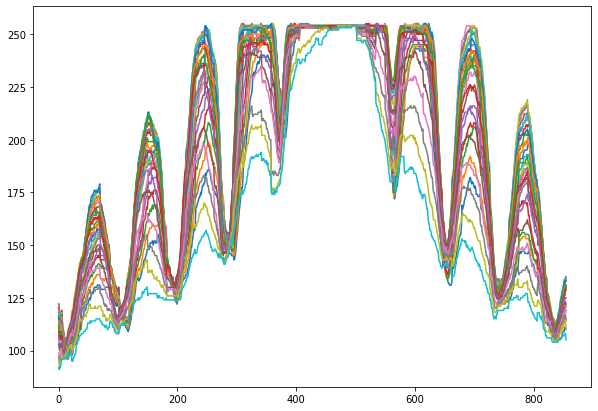

In [124]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

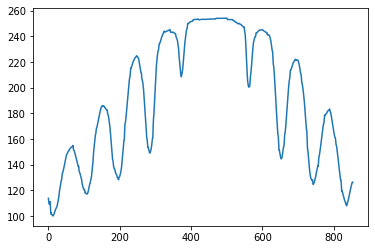

In [125]:
def promedio(R):
    mediana = []
    error = []
    for i in range(len(R)):
        mediana.append(np.mean(R[i]))
        error.append(np.std(R[i]))
    return mediana, error 

%matplotlib inline

mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
#puntos_x = np.array(plt.ginput(9))
#puntos_x

In [126]:
y = - np.array(mediana) 

[ 13 108 197 285 373 562 653 743 837]
La diferencia media entre minimos es: 70.40398797398676


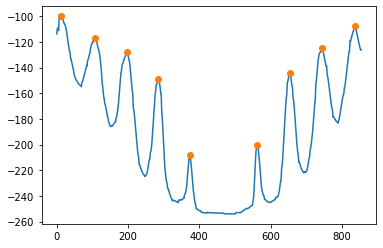

In [127]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 80)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')
#plt.axis([0, 160, -1.1, 1.1])

### DATO ROJO  7

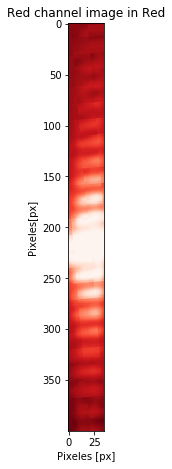

In [107]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo7'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 5)[250:650,320:355]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)


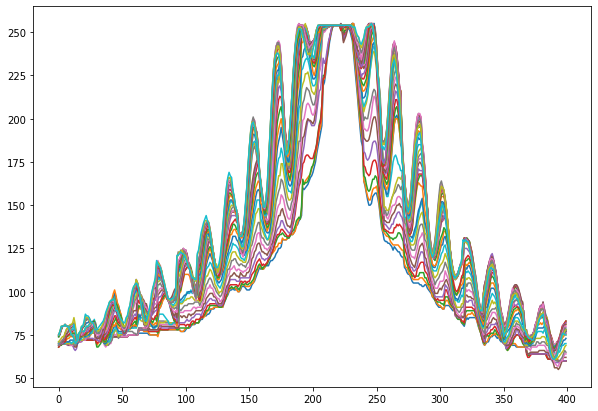

In [108]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

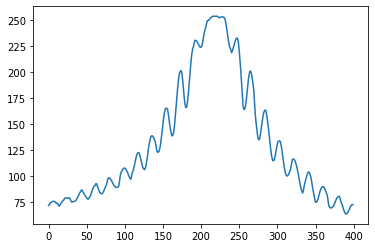

In [110]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))

In [111]:
y = - np.array(mediana)

[ 14  30  52  70  89 108 126 143 162 180 199 224 240 256 276 295 313 333
 350 370 390]
[16 22 18 19 19 18 17 19 18 19 25 16 16 20 19 18 20 17 20 20]
La diferencia media entre minimos es: 18.8


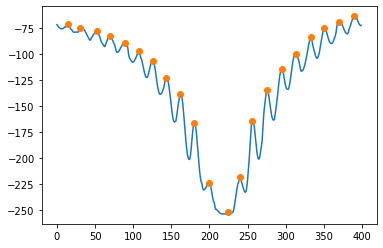

In [114]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 15)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')
#plt.axis([0, 160, -1.1, 1.1])

### DATO ROJO  2

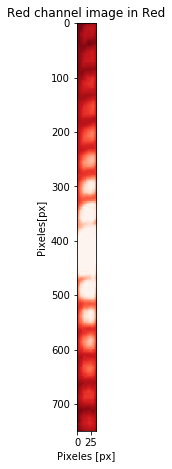

In [139]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo2'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 2)[50:800,300:335]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)


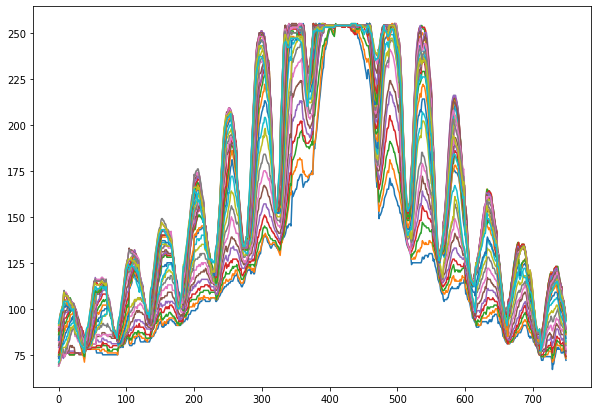

In [140]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

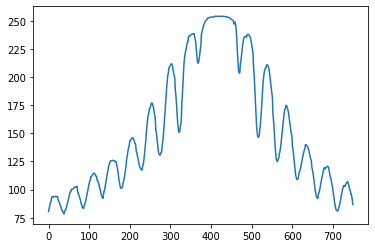

In [141]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[ 38  86 134 179 230 274 321 368 421 470 516 563 612 662 711]
[48 48 45 51 44 47 47 53 49 46 47 49 50 49]
La diferencia media entre minimos es: 45.789064955904216


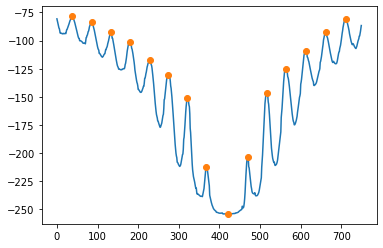

In [144]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 40)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  3

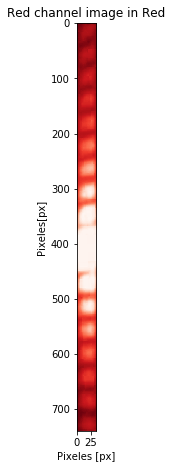

In [159]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo3'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 2.5)[60:800,305:340]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)


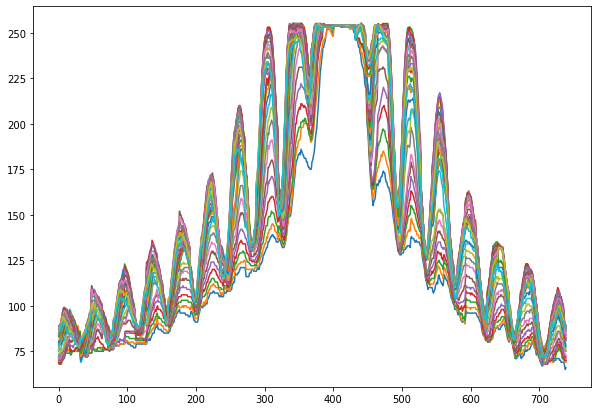

In [160]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

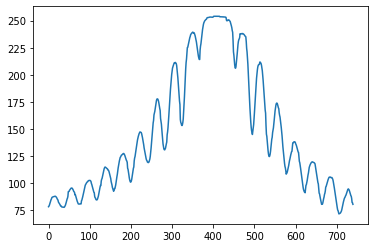

In [161]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[ 37  78 158 199 242 282 324 367 454 495 536 577 623 663 705]
[41 80 41 43 40 42 43 87 41 41 41 46 40 42]
La diferencia media entre minimos es: 47.714285714285715 +- 14.742691028964494


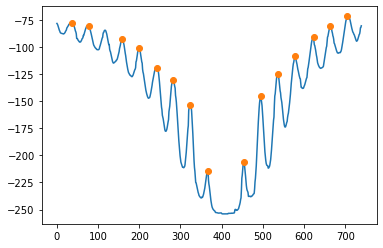

In [162]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 40)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  4

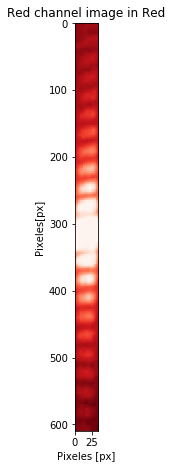

In [186]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo4'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 3)[150:760,310:345]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

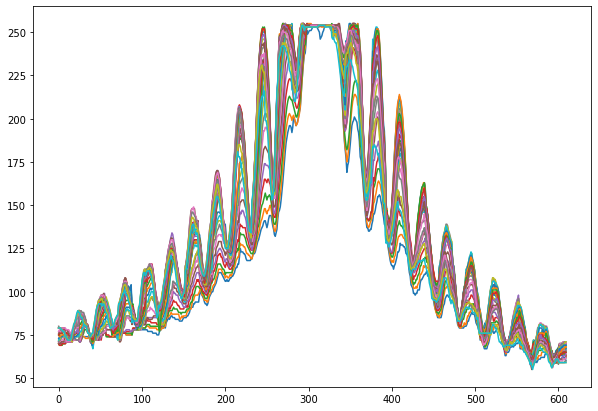

In [187]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

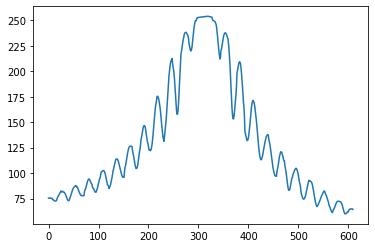

In [188]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[ 14  40  68  95 121 151 175 204 231 258 285 311 343 370 398 425 456 481
 510 537 568 593]
[26 28 27 26 30 24 29 27 27 27 26 32 27 28 27 31 25 29 27 31 25]
La diferencia media entre minimos es: 27.571428571428573 +- 2.060315014550851


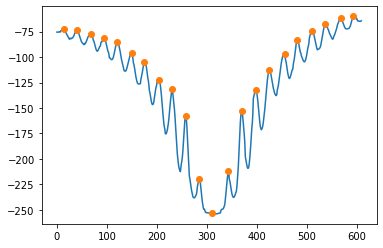

In [189]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 20)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  5

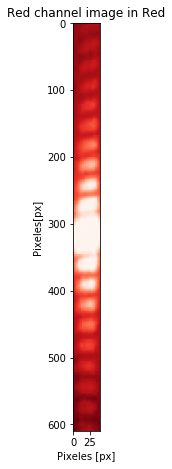

In [196]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo5'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 3)[150:760,305:345]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

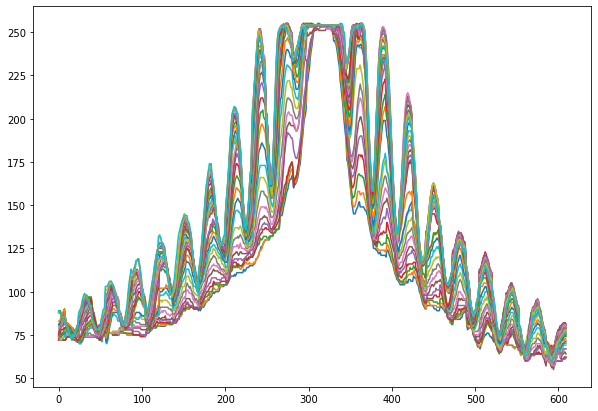

In [197]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

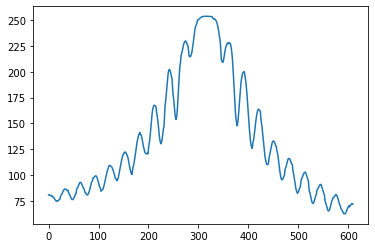

In [198]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[ 18  48  77 105 137 167 196 225 255 282 330 348 377 407 437 467 498 529
 560 592]
[30 29 28 32 30 29 29 30 27 48 18 29 30 30 30 31 31 31 32]
La diferencia media entre minimos es: 30.210526315789473 +- 5.104991853887218


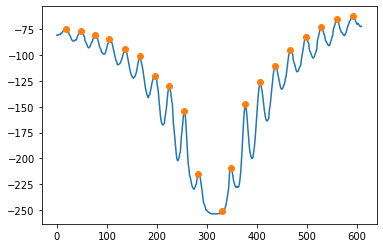

In [205]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 18)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  6

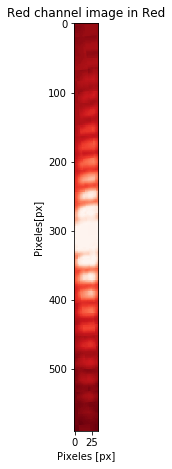

In [222]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo6'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 4)[160:750,315:350]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

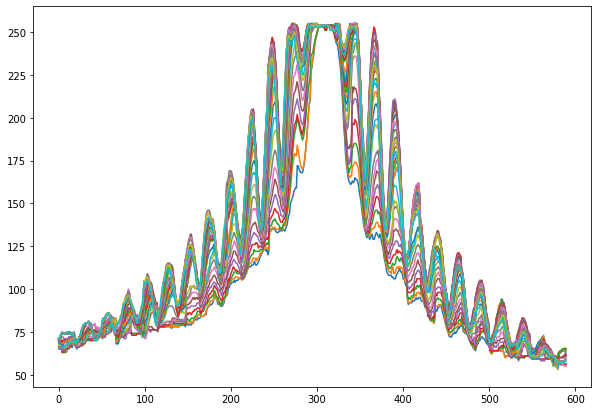

In [223]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

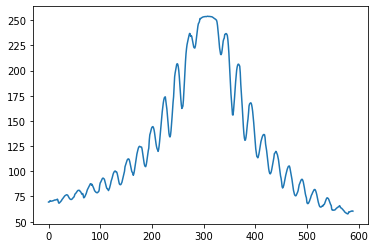

In [224]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[  1  20  44  68  94 116 139 164 188 212 235 258 283 306 334 357 380 405
 429 453 478 502 527 551 579]
[19 24 24 26 22 23 25 24 24 23 23 25 23 28 23 23 25 24 24 25 24 25 24 28]
La diferencia media entre minimos es: 24.083333333333332 +- 1.777560750641795


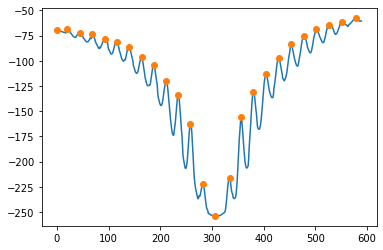

In [226]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 15)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  8

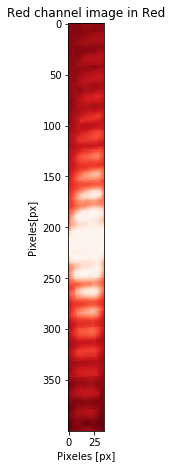

In [243]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo8'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 4.1)[250:650,315:350]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

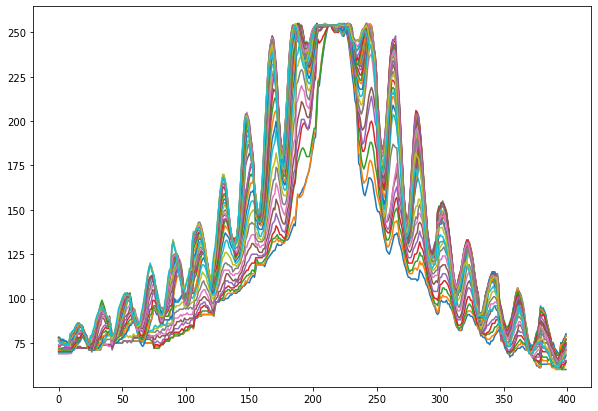

In [244]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

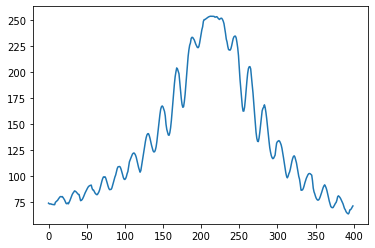

In [245]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[  7  26  42  63  80 100 120 138 158 176 196 219 238 255 275 294 313 332
 353 372 393]
[19 16 21 17 20 20 18 20 18 20 23 19 17 20 19 19 19 21 19 21]
La diferencia media entre minimos es: 19.3 +- 1.5842979517754863


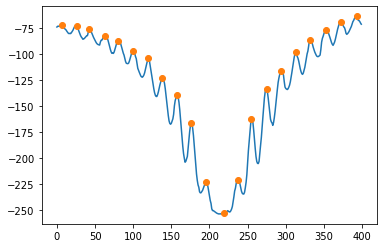

In [247]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 15)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')

### DATO ROJO  9

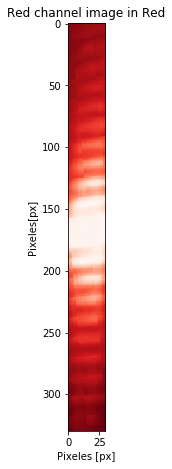

In [268]:
%matplotlib inline

color = 'Red'
A = images_dict['datosrojo9'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')

R = ndimage.rotate(A, 5.1)[300:630,325:355]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

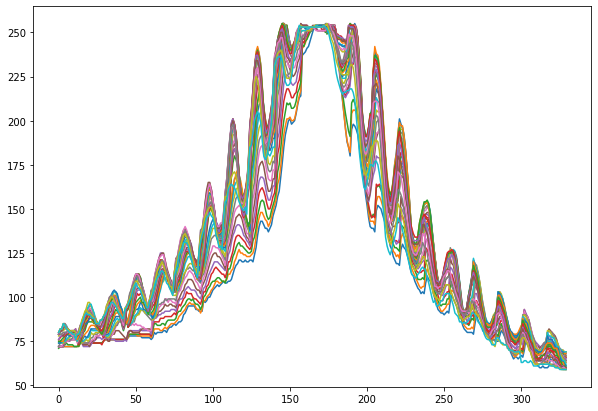

In [269]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

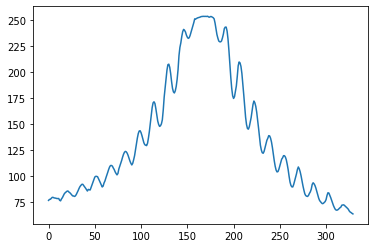

In [270]:
mediana, error = promedio(R)
plt.plot(range(len(mediana)),np.array(mediana))
y = - np.array(mediana)

[ 13  28  42  58  74  90 106 120 136 151 174 186 200 216 232 247 264 280
 296 311]
[15 14 16 16 16 16 14 16 15 23 12 14 16 16 15 17 16 16 15]
La diferencia media entre minimos es: 15.68421052631579 +- 2.053306231908543


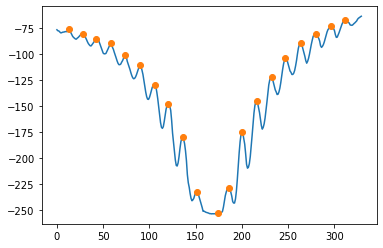

In [271]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y,distance= 10)
plt.plot(range(len(y)),y)
plt.plot(peaks, y[peaks], "o")
print(peaks)

p = np.diff(peaks)
print(p)
print(f'La diferencia media entre minimos es: {np.mean(p)} +- {np.std(p)}')